# Binary Classification

In [117]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Import data

In [21]:
# Load the data
cardio_df = pd.read_csv('CardioGoodFitness.csv')
cardio_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [22]:
#Find the uniqe values in the product column
cardio_df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [24]:
# Check for null values and data types
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [25]:
# Convert the object data type to category
cardio_df['Product'] = cardio_df['Product'].astype('category')
cardio_df['Gender'] = cardio_df['Gender'].astype('category')
cardio_df['MaritalStatus'] = cardio_df['MaritalStatus'].astype('category')
cardio_df['Fitness'] = cardio_df['Fitness'].astype('category')

# Fix fitness levels to be ordered
cardio_df['Fitness'] = cardio_df['Fitness'].cat.reorder_categories([1, 2, 3, 4, 5], ordered=True)
cardio_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


### Preprocessing

In [30]:
# Merge product TM195 and TM 498 into one category
cardio_df['Product'] = cardio_df['Product'].replace(['TM195', 'TM498'], 'TM195_TM498')
cardio_df['Product'].unique()


['TM195_TM498', 'TM798']
Categories (2, object): ['TM195_TM498', 'TM798']

In [31]:
# Transform the categorical variables into numerical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Create the target variable
target = cardio_df['Product'] = le.fit_transform(cardio_df['Product'])
target

cardio_df['Gender'] = le.fit_transform(cardio_df['Gender'])
cardio_df['MaritalStatus'] = le.fit_transform(cardio_df['MaritalStatus'])
cardio_df['Fitness'] = le.fit_transform(cardio_df['Fitness'])


In [32]:
#Drop the target column ['Procduct']
cardio_df.drop(['Product'], axis=1, inplace=True)

#Drop categories that are not needed as features
cardio_df.drop(['Gender', 'MaritalStatus'], axis=1, inplace=True)
cardio_df.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,3,29562,112
1,19,15,2,2,31836,75
2,19,14,4,2,30699,66
3,19,12,3,2,32973,85
4,20,13,4,1,35247,47


In [33]:
#Scale the data using StandardScaler
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(cardio_df)
scaled_df = pd.DataFrame(scaled_df, columns=cardio_df.columns)
scaled_df.head()

,Age,Education,Usage,Fitness,Income,Miles
0,-1.558146,-0.974987,-0.421117,0.720443,-1.467585,0.170257
1,-1.413725,-0.354854,-1.345520,-0.325362,-1.329438,-0.545143
2,-1.413725,-0.974987,0.503286,-0.325362,-1.398512,-0.719159
3,-1.413725,-2.215254,-0.421117,-0.325362,-1.260365,-0.351792
4,-1.269303,-1.595120,0.503286,-1.371166,-1.122218,-1.086527


In [66]:
# Use RandomUnderSampler to balance the dataset
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy= {0: 80, 1: 40})
X_res, y_res = rus.fit_resample(scaled_df, target)
X_res.shape

(120, 6)

## Model Building

In [129]:
#Make a model pipeline with different models and see which one performs the best
#Using the following models:
#1. KNN
#2. Decision Tree
#3. Logistic Regression
#4. SVM

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

#Create a list with all the models
model_pipeline = []
model_pipeline.append(DecisionTreeClassifier(random_state=42))
model_pipeline.append(KNeighborsClassifier(metric='euclidean'))
model_pipeline.append(LogisticRegression(random_state=42))
model_pipeline.append(SVC(random_state=42))


In [118]:

# Create the list of models and the accuracy of each model
model_list = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM']
accuracy_list = []
mean_corss_val = []

traning_accuracy_list = []
accuracy_list = []
mean_corss_val = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    traning_accuracy_list.append(model.score(X_train, y_train))
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_corss_val.append(scores.mean())

# Let us now compare the performance of the models
result_df = pd.DataFrame({'Model': model_list, 'Traning Accuracy': traning_accuracy_list,
                         'Accuracy': accuracy_list, 'Cross Validation': mean_corss_val})
result_df


,Model,Traning Accuracy,Accuracy,Cross Validation
0,Decision Tree,1.000000,0.972222,0.928676
1,KNN,0.988095,0.944444,0.976471
2,Logistic Regression,1.000000,0.972222,0.988235
3,SVM,1.000000,0.972222,0.988235


### Decision Tree

In [119]:

# Create the decision tree classifier model
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1,
                             max_features=3, min_samples_split=2, splitter='best', random_state= 42)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Print the accuracy score
print('Accuracy: ', dtc.score(X_test, y_test))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
scores = cross_val_score(dtc, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)


Accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Mean cross-validation score:  0.9176470588235294
Standard deviation in cross-validation score:  0.05998846486579749


In [128]:
# Hyperparameter tuning for decision tree classifier
# define the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5, 6,],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1, 2,],
    'max_features': [ 5, 6],
    'splitter': ['best', 'random'],
    'random_state': [42],
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5,)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
Best cross-validation score: 0.9764705882352942


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\magsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\magsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\magsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in

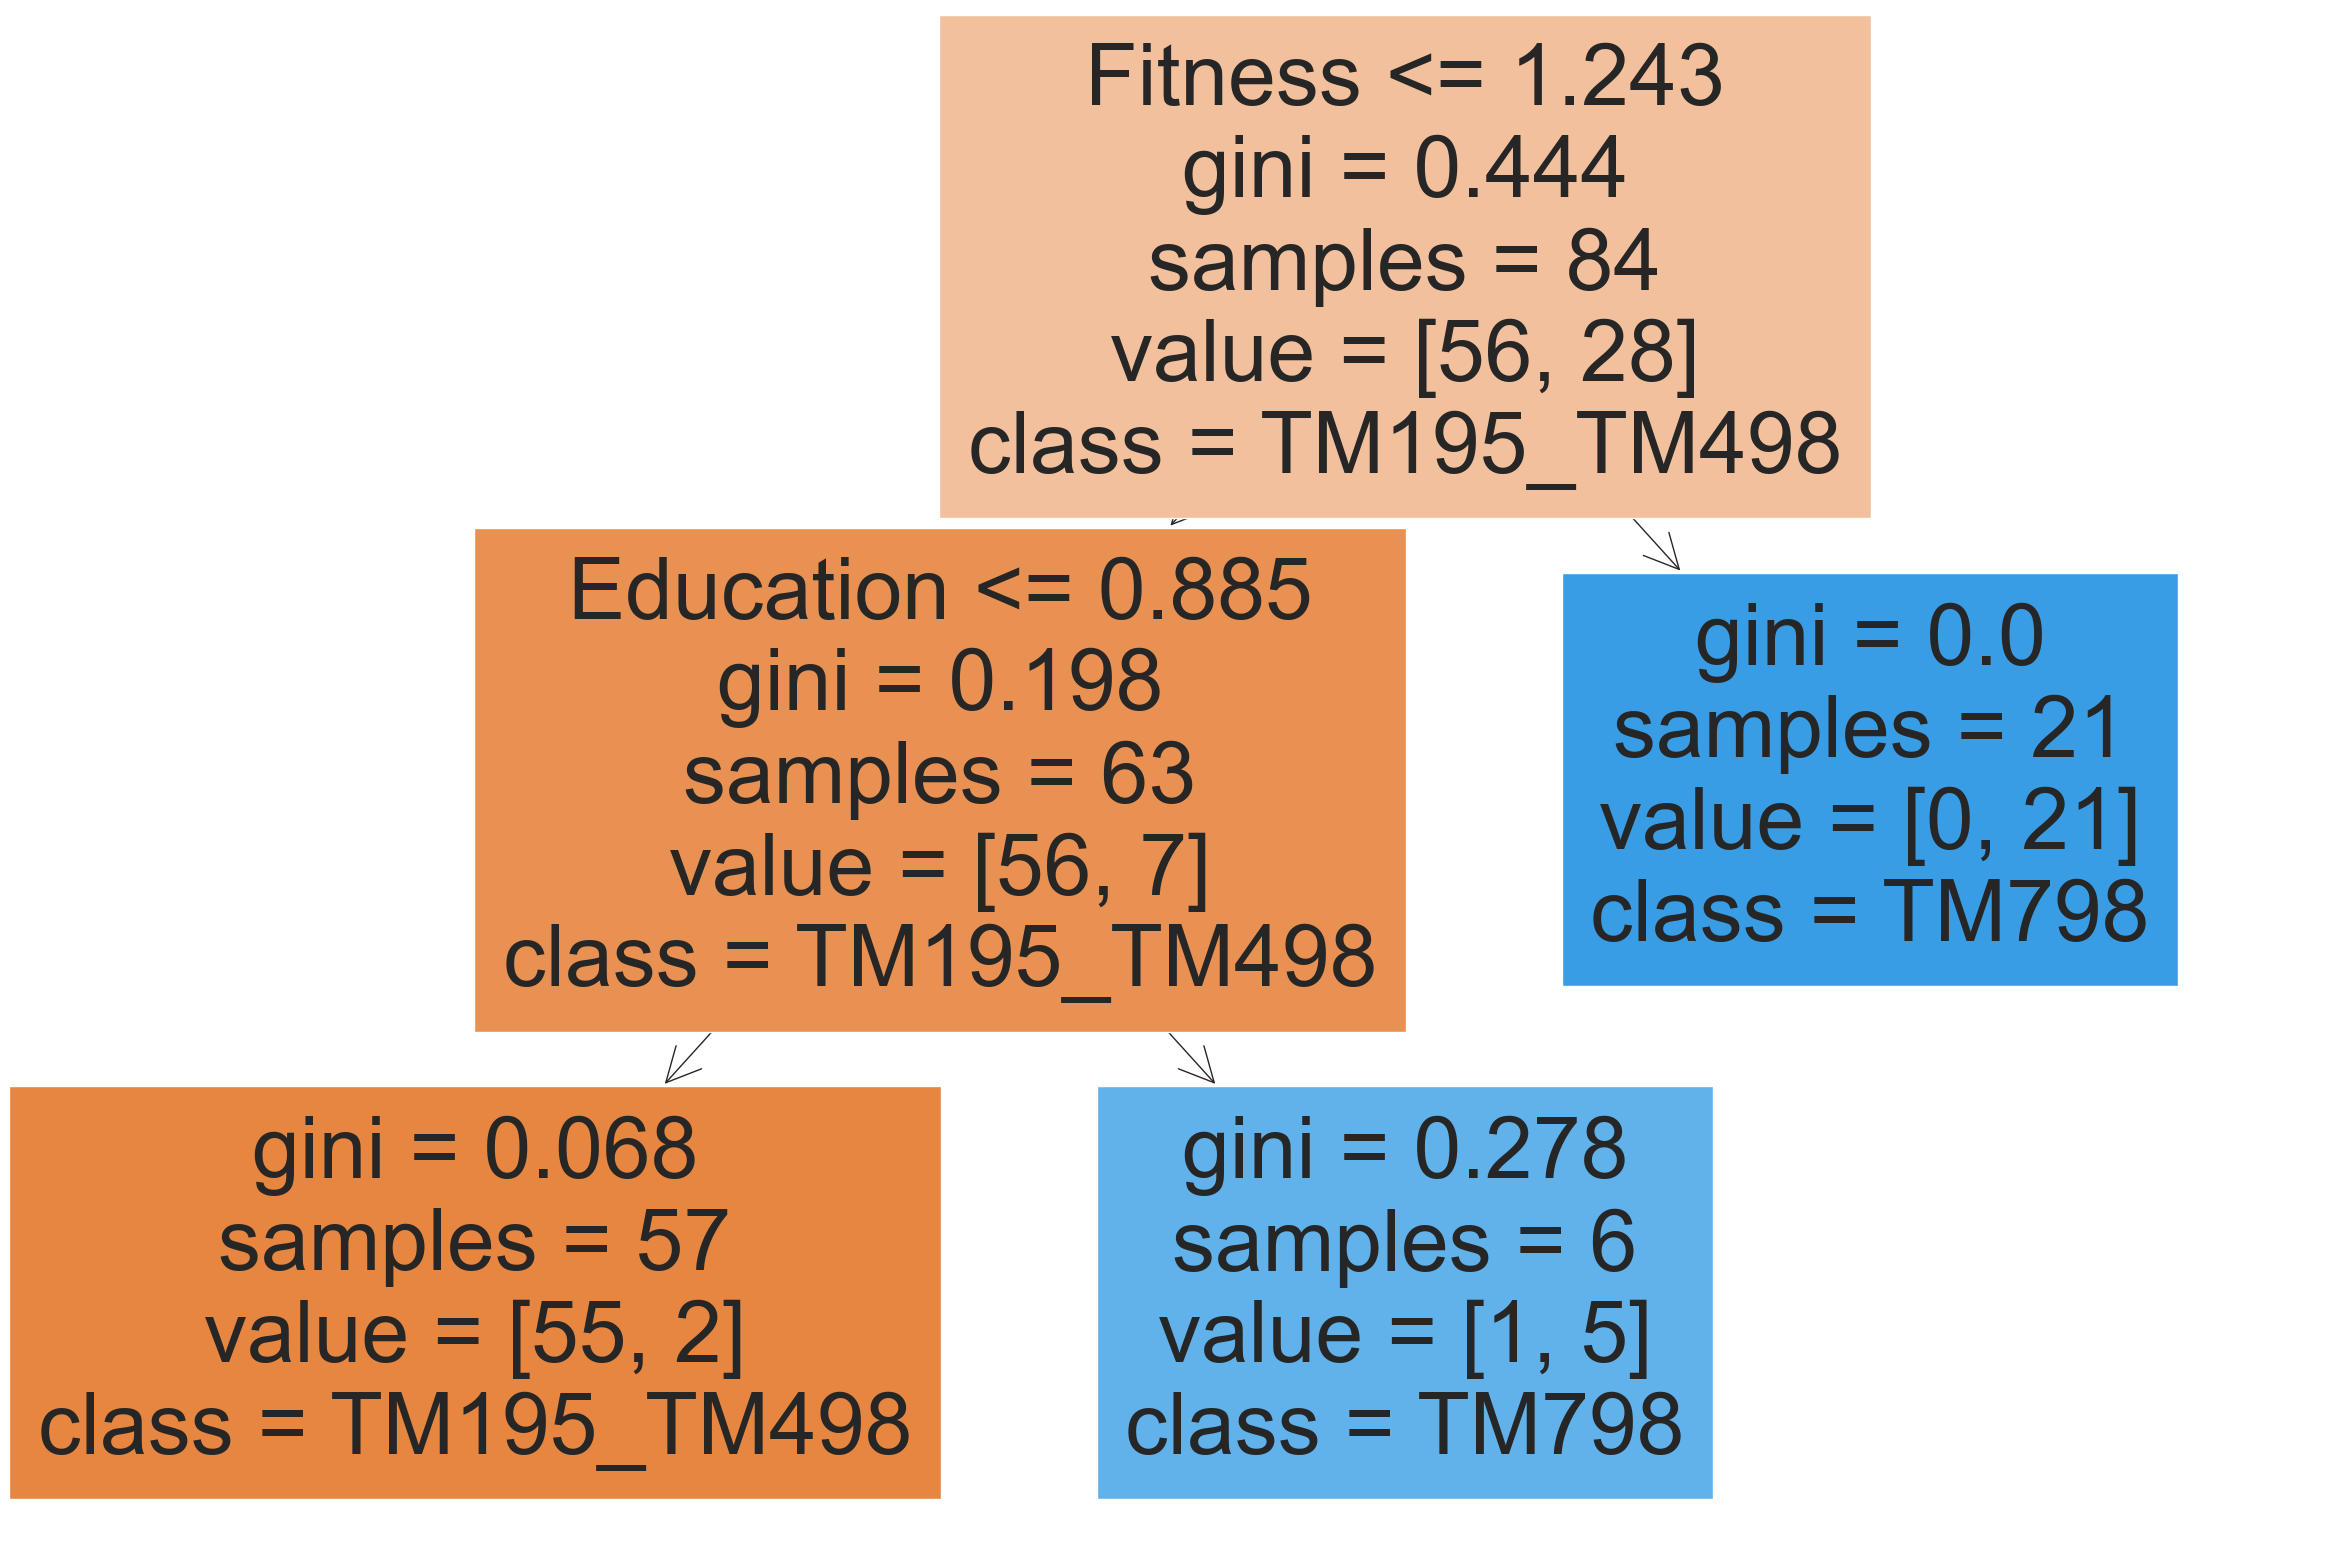

In [127]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(dtc, filled=True, feature_names=cardio_df.columns,
          class_names=['TM195_TM498', 'TM798'])
plt.show()


### KNN

In [122]:
#Create KNN model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)

scores = cross_val_score(knn, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

# Print the scores
print('Training Accuracy: ', knn.score(X_train, y_train))
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_pred))
print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)




Training Accuracy:  0.9761904761904762
Accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Mean cross-validation score:  0.9882352941176471
Standard deviation in cross-validation score:  0.02352941176470589


In [123]:
# Hyperparameter tuning for KNN
# define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}


knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5,)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.9882352941176471


### Logistic Regression

In [124]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, solver='liblinear', penalty='l2', multi_class='ovr'  ,random_state=42 )

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = lr.score(X_test, y_test)

scores = cross_val_score(lr, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

#print the scores
print('traning accuracy: ', lr.score(X_train, y_train))
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_pred))
print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)


traning accuracy:  1.0
Accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Mean cross-validation score:  0.9882352941176471
Standard deviation in cross-validation score:  0.02352941176470589


In [125]:
#Tune the hyperparameters of the logistic regression model
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs','newton-cg', 'sag'],
    'multi_class': ['ovr', 'multinomial'],
    'random_state': [42],
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

scores = cross_val_score(lr, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

#Print the best hyperparameters
print("Best parameters: ", best_params)
print("Mean cross-validation score:", mean_score)
print("Standard deviation in cross-validation score:", std_score)


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Best parameters:  {'C': 1, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Mean cross-validation score: 0.9882352941176471
Standard deviation in cross-validation score: 0.02352941176470589


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 

### SVM

In [126]:
#SVM model

svm = SVC(C=1, gamma='scale', probability= True, random_state=42, kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = svm.score(X_test, y_test)

scores = cross_val_score(svm, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

#print the scores
print('traning accuracy: ', svm.score(X_train, y_train))
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_pred))
print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)

traning accuracy:  1.0
Accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Mean cross-validation score:  1.0
Standard deviation in cross-validation score:  0.0


In [85]:
#Tune the hyperparameters of the SVM model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000],
    'gamma': ['scale', 'auto'],
    'probability': [True, False],
    'random_state': [42],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
}

grid_search = GridSearchCV(svm, param_grid, cv=5)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

scores = cross_val_score(svm, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

#Print the best hyperparameters
print("Best parameters: ", best_params)
print("Mean cross-validation score:", mean_score)


Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'probability': True, 'random_state': 42}
Mean cross-validation score: 0.9882352941176471
